In [1]:
import os
import glob
import random
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd


# Set Parameters

In [2]:
n_neighbors=100
downsample_step=(60,60)

grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

# Load detail

In [3]:
detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

In [4]:
from compute_cell_velocity import compute_cell_velocity

gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              n_neighbors=n_neighbors,
              step=downsample_step)

(2000, 12329)
(2000, 12329)


/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src/compute_cell_velocity.py:144: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


In [5]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN


# Estimate pseudotime

There are 2 clusters.
They are:  [0 1]



cluster  0
MAX allowed zero time cells are:  17
99  Cells left.
Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.10962533918951177
Between dot 538  from refPath1 and dot 4 from refPath2.
now the cell time is updated for cluster:  0
shifting ref_path2 by time  534



cluster  0
MAX allowed zero time cells are:  17
Only  3  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  10
11  Cells left.
Sampling new trajectories for zero-time cells in cluster  1   ...
The closest distance is  0.11797020997847776
Between dot 0  from refPath1 and dot 0 from refPath2.
now the cell time is updated for cluster:  1
shifting ref_path2 by time  0



cluster  1
MAX allowed zero time cells are:  10
Only  2  Cells left. Stopping.



All intra cluster cell time has been resolved.




Consolidating time between clusters  0  and  1 ..


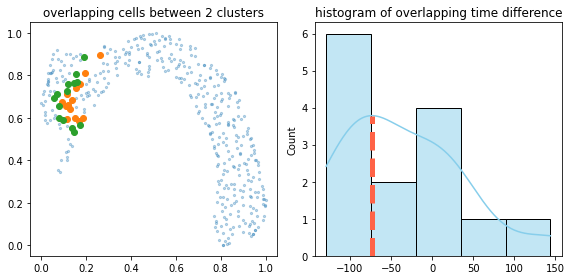

shift time is:  0 .
The overlapping cells are: 
cell  255  from cluster  0  and  257  from cluster  1


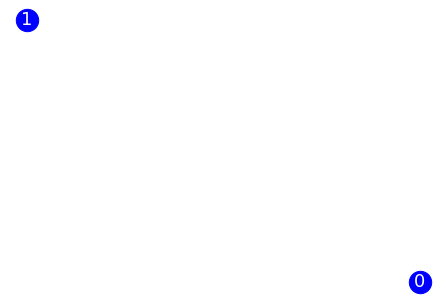



All inter cluster cell time has been resolved.



There are 12329 cells.
--- 29.620195150375366 seconds ---


In [6]:
#import importlib
#importlib.reload(sys.modules['pseudo_time'])
from pseudo_time import pseudo_time


cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

In [7]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN,0.642493
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN,0.574449
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN,0.587397
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN,0.755234
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN,0.741529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN,0.938017
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN,0.975758
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN,0.957300
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN,0.946281


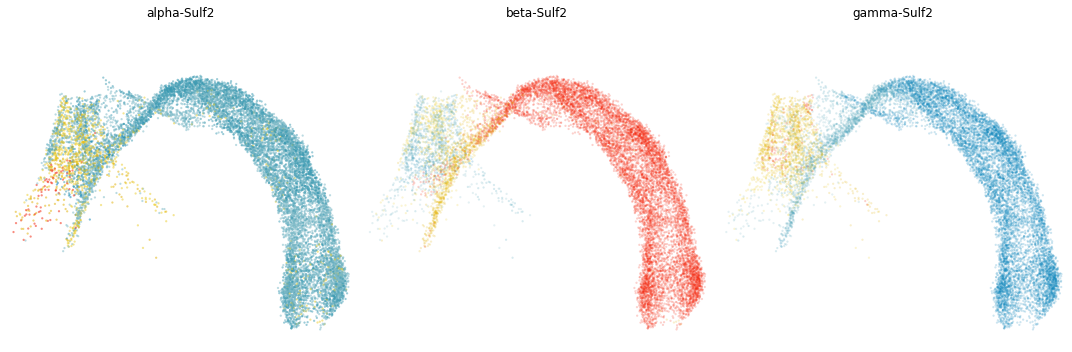

In [8]:
import cdplt
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Sulf2'
cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

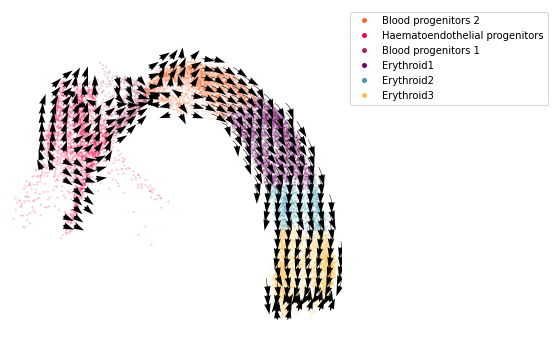

In [9]:

fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=clusters, alpha=0.2, 
             gene_name=gene, velocity=True, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

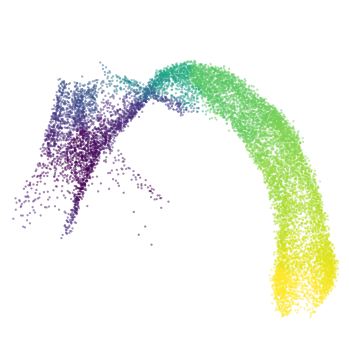

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

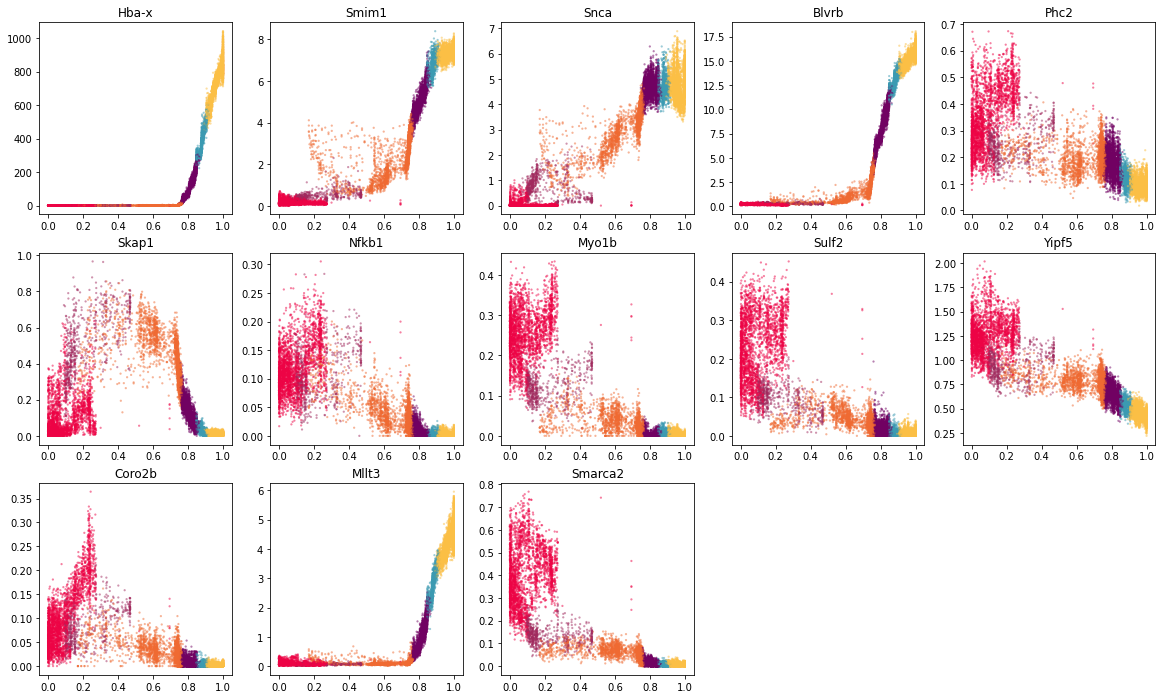

In [11]:
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']
import math
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=clusters,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
plt.show()

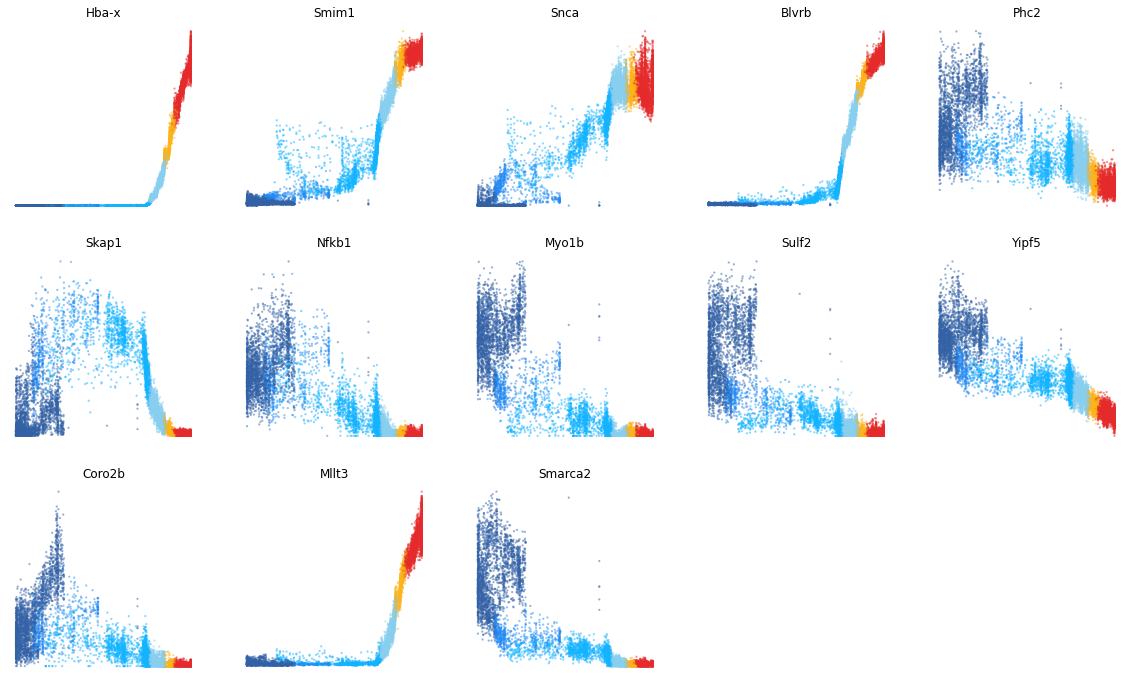

In [12]:
# NOT SMOOTHED YET
import colormap
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


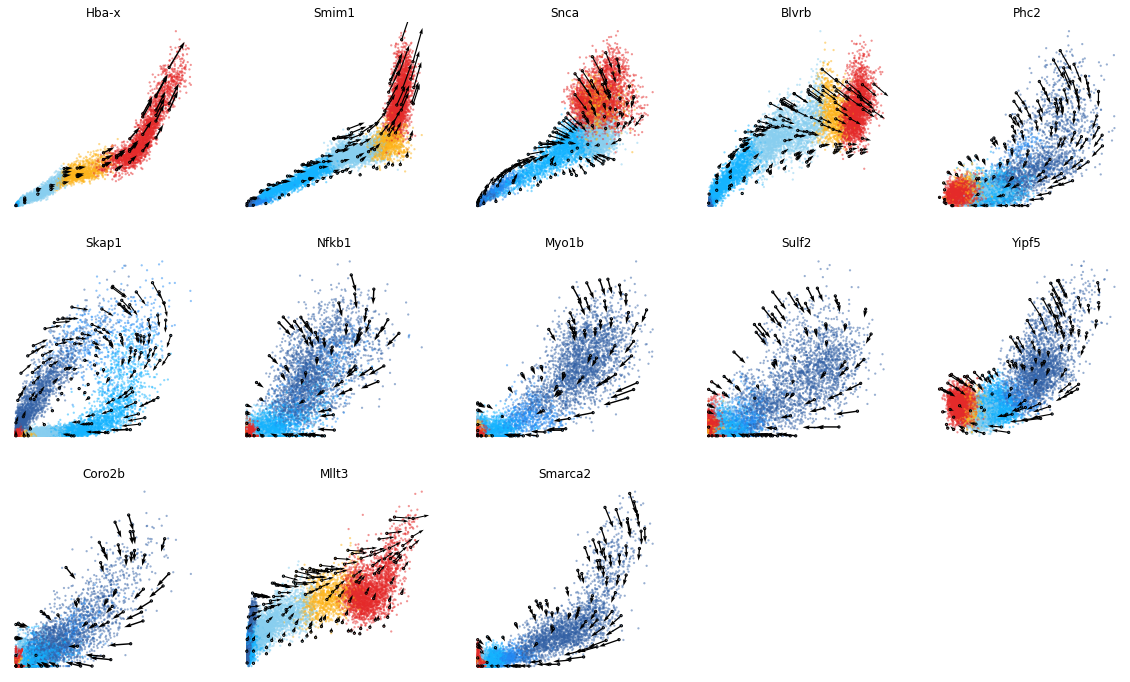

In [13]:
# NOT SMOOTHED YET
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


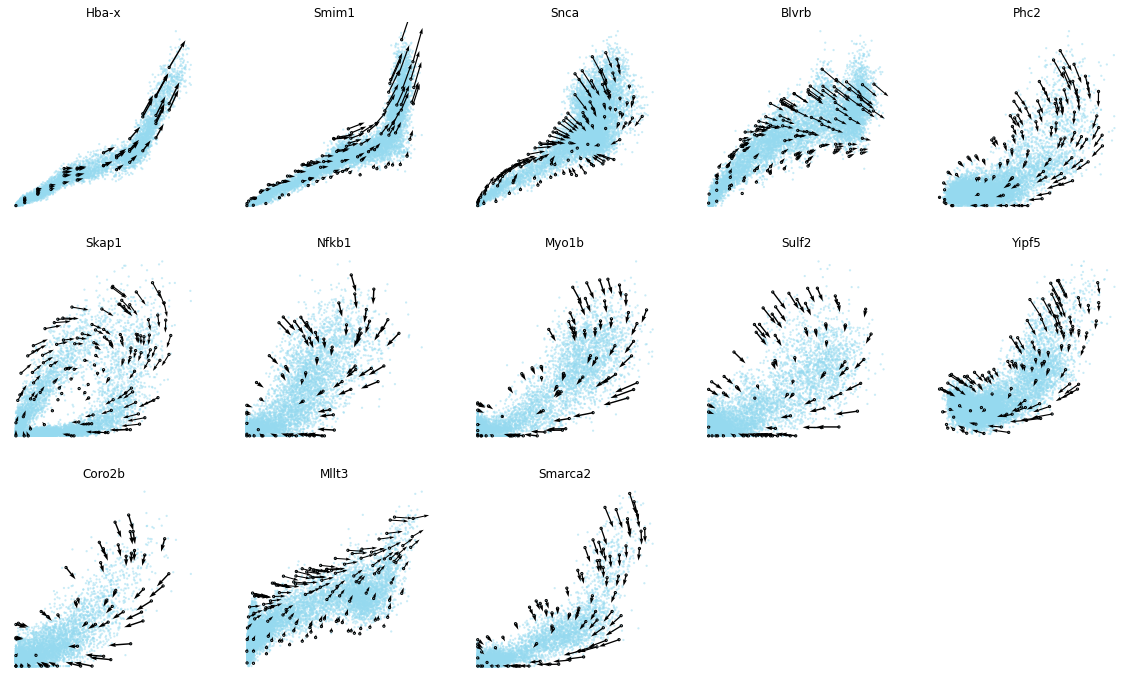

In [14]:
# NOT SMOOTHED YET
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


# rsquare rank

In [20]:
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
import sys
sys.path.append(srcdir)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from utilities import get_gene_s0_by_time

cell_time=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]][['cellIndex','pseudotime']]

s0_merged_part_gene,s0_merged_part_time=get_gene_s0_by_time(cell_time,load_cellDancer)

In [24]:
s0_merged_part_gene

,0610010F05Rik,1110038B12Rik,1500009L16Rik,1700017B05Rik,1700027J19Rik,1700037H04Rik,1810022K09Rik,1810026B05Rik,1810032O08Rik,2410003L11Rik,...,Zfpm1,Zmynd19,Zmynd8,Znrf1,Znrf3,Zrsr2,Zscan21,Zscan26,Zswim6,Zswim7
0,0.116719,0.913440,0.635686,0.241008,0.635354,0.611199,1.107088,0.305986,0.156173,0.030989,...,0.121177,0.718622,0.276792,0.482638,0.028866,0.985716,0.463381,0.037848,0.115178,0.511409
1,0.095321,0.661304,0.532173,0.279799,0.881801,0.389928,1.341168,0.269964,0.226027,0.008434,...,0.143431,0.730320,0.319225,0.633383,0.038136,1.477184,0.460606,0.055630,0.115485,0.443967
2,0.110700,0.695618,0.540311,0.237327,0.877853,0.418060,1.498127,0.221777,0.248409,0.008434,...,0.130489,0.831389,0.288888,0.622082,0.050876,1.352973,0.415809,0.080092,0.077000,0.421829
3,0.156284,0.942190,0.702691,0.237929,0.826311,0.580219,1.160044,0.263720,0.190872,0.028383,...,0.153803,0.813078,0.234910,0.401201,0.029389,1.056472,0.418128,0.047294,0.076763,0.561559
4,0.100051,0.591669,0.486429,0.242630,0.880725,0.382166,1.239232,0.236244,0.255554,0.008041,...,0.147085,0.878734,0.266557,0.565910,0.055743,1.348478,0.432001,0.039553,0.086870,0.438731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.056492,0.491470,0.036457,0.054794,0.000000,1.172599,0.872327,0.147587,0.218678,0.046581,...,0.602336,0.373773,0.105840,0.170140,0.028368,0.226489,0.167206,0.004828,0.000000,0.211326
12325,0.066186,0.582242,0.033817,0.056761,0.000000,1.381859,0.954222,0.104590,0.176506,0.023029,...,0.658140,0.339404,0.077158,0.188316,0.006443,0.192111,0.161071,0.000000,0.000000,0.237378
12326,0.041933,0.724743,0.098554,0.067797,0.027856,1.380381,1.648947,0.095279,0.133703,0.049809,...,0.872025,0.332675,0.112593,0.164108,0.029233,0.302112,0.132042,0.000000,0.003893,0.217242
12327,0.065095,0.662288,0.059584,0.098689,0.006044,1.329531,1.220339,0.048585,0.154132,0.071674,...,0.617702,0.501019,0.069201,0.143500,0.009681,0.315203,0.174174,0.011063,0.006619,0.207298


In [25]:
s0_merged_part_time

,index,time
0,10368,0.0
1,6914,0.0
2,8576,0.0
3,8608,0.0
4,3601,0.0
...,...,...
12324,7511,1.0
12325,4028,1.0
12326,4025,1.0
12327,4024,1.0


In [29]:
from utilities import *

import importlib
importlib.reload(sys.modules["utilities"])

onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_idx=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)
gene_list=s0_merged_part_gene.columns

r_square_non_para_list_sort,non_para_fit_heat,non_para_fit_list,sampled_idx=get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,cell_choice=cell_idx,)


/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
r_square_non_para_list_sort

,gene_name,r_square,combined
187,Blvrb,0.994100,"[0.2888470026582346, 0.27979290927291456, 0.26..."
742,Hbb-bh1,0.994051,"[1.4941495435933763, 1.1848091000482384, 1.159..."
74,Alad,0.993941,"[1.078836702016595, 1.0486249591254029, 1.0327..."
741,Hba-x,0.993146,"[0.03506532163008504, 0.023620117649202566, 0...."
753,Hebp1,0.992027,"[0.06265713188176844, 0.054387097181203395, 0...."
...,...,...,...
517,Epha5,0.051851,"[-0.00034312142709333037, -0.00026870035540436..."
1996,Zscan21,0.044069,"[0.18870623879903892, 0.187582784471244, 0.185..."
831,Igfbpl1,0.040413,"[0.008525550024422311, 0.00846497657392104, 0...."
1735,Tbx4,0.027905,"[-3.933731226336753e-05, -3.512124771484434e-0..."
